# Song Lyric Data
### Catherine Chen, Fiona Chung, Safia Williams

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Read in and explore data

In [3]:
df = pd.read_csv('lyrics.csv', index_col=['index'])
df.head()

,song,year,artist,genre,lyrics
index,,,,,
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
print "There are", df.shape[0], "total songs in this dataset."

There are 362237 total songs in this dataset.


In [5]:
'''Identify any missing data'''
for col in df:
    print col, df[col].count()

song 362235
year 362237
artist 362237
genre 362237
lyrics 266557


#### Year

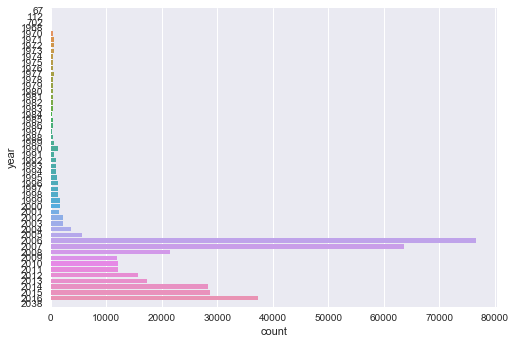

In [5]:
sns.set(style="darkgrid")
year_plt = sns.countplot(y = "year", data = df)

In [6]:
year_df = df.groupby("year")

# Top 10 years w/lyrics
year_df = year_df.count().sort_values(by = "lyrics", ascending = False).head(10)
year_df

,song,artist,genre,lyrics
year,,,,
2006,76590,76590,76590,74257
2007,63677,63677,63677,62562
2008,21497,21497,21497,19609
2014,28250,28250,28250,12769
2012,15789,15789,15789,11299
2016,37409,37409,37409,11105
2013,17331,17331,17331,10836
2009,12027,12029,12029,10179
2015,28766,28766,28766,10156


#### Artist

In [7]:
print "There are", len(df["artist"].unique()), "different artists in this dataset."

There are 18231 different artists in this dataset.


In [8]:
artist_df = df.groupby("artist")

# Top 10 artists w/lyrics
artist_df = artist_df.count().sort_values(by = "lyrics", ascending = False).head(10)
artist_df

,song,year,genre,lyrics
artist,,,,
dolly-parton,755,755,755,744
elton-john,680,680,680,676
chris-brown,655,655,655,628
barbra-streisand,624,624,624,607
bob-dylan,614,614,614,596
bee-gees,599,599,599,591
eddy-arnold,628,628,628,591
eminem,589,589,589,578
ella-fitzgerald,623,623,623,571


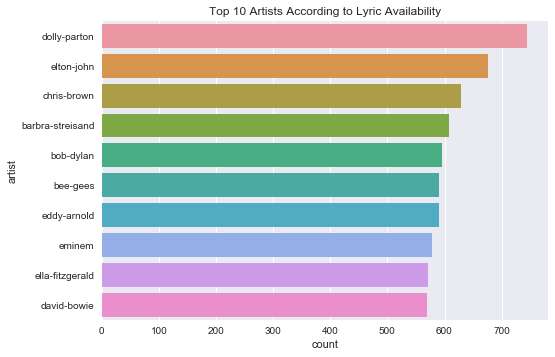

In [9]:
artist_plt = sns.barplot(x = "lyrics", y = artist_df.index, data = artist_df)
artist_plt.set_title("Top 10 Artists According to Lyric Availability")
artist_plt.set_xlabel("count")

#### Genre

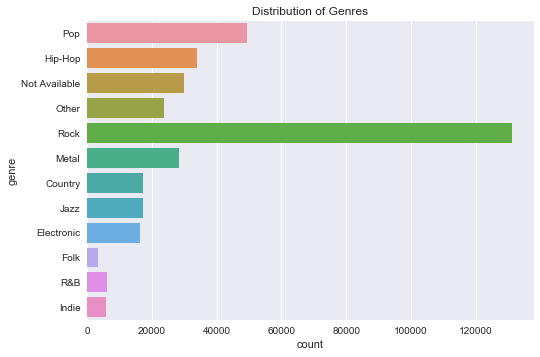

In [12]:
genre_plt = sns.countplot(y = "genre", data = df)
genre_plt.set_title("Distribution of Genres")

## Clean up data

#### Lyrics
##### We will start training at 10 songs, then increase the amount of training data and examine the differences in output quality. (Note: for timing purposes, for the 10 set size, we ended up only using the pop training set and it was used more as a test for us to become familiar with the models. For our final report, we will compare the performance of the models trained on the Dolly Parton songs and the 5000 song set)

In [6]:
import random

In [13]:
''' Given a category (year, artist, genre), target value, and an integer, generates a sample training set of size 
    num_songs to train our model '''
def gen_training_songs(category, target, num_songs):
    sample_df = df.loc[df[category] == target]
    sample_df = sample_df[sample_df["lyrics"].str.len() > 10]
    rand_sample_songs = [random.randint(0,sample_df.shape[0]) for i in range(num_songs)]
    return sample_df.iloc[rand_sample_songs]

In [11]:
''' Given a dataframe of song data and number of songs to sample, generates a .txt that contains num_songs number of
    lyrics to train our model '''
def sample_lyrics(df, num_songs):
    sample_df = df[df["lyrics"].str.len() > 10]
    rand_sample_songs = [random.randint(0,sample_df.shape[0]) for i in range(num_songs)]
    sample_df = sample_df.iloc[rand_sample_songs]
    sample_df.to_csv(("sample_" + str(num_songs) + ".txt"),header = None, index = None, columns = ["lyrics"], encoding = "utf-8")

#### Generate various training datasets
- 3x10 songs (genre: pop, year: 2006, artist: Dolly Parton)
- Dolly Parton songs (744 total songs)
- Sample sizes: 1000, 2500, 5000

In [19]:
mini_pop_training = gen_training_songs("genre", "Pop", 10)
mini_pop_training.to_csv("pop_10_.txt", header = None, index = None, columns = ["lyrics"])

In [20]:
mini_year_training = gen_training_songs("year", 2006, 10)
mini_year_training.to_csv("year_10_training.txt", header = None, index = None, columns = ["lyrics"])

In [18]:
mini_artist_training = gen_training_songs("artist", "dolly-parton", 10)
mini_artist_training.to_csv("artist_10_.txt", header = None, index = None, columns = ["lyrics"])

In [15]:
dolly_training = gen_training_songs("artist", "dolly-parton", 744)
dolly_training.to_csv("dolly_training.txt", header = None, index = None, columns = ["lyrics"], encoding = "utf-8")

In [12]:
sample_1000 = sample_lyrics(df, 1000)
sample_2500 = sample_lyrics(df, 2500)
sample_5000 = sample_lyrics(df, 5000)